In [1]:
%pwd

'/Users/matthewlavin/Denison-DA-350-Fall-2022'

In [2]:
import tensorflow as tf
#https://pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [5]:
pwd

'/Users/matthewlavin/Denison-DA-350-Fall-2022'

In [6]:
RMSprop = tf.keras.dtensor.experimental.optimizers.RMSprop
# could also use Adam here 
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
  'page_images/',
  labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=50,
    image_size=(200, 200),
    shuffle=True,
    seed=124,
    validation_split=0.25,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = _set = tf.keras.utils.image_dataset_from_directory(
  'page_images/',
  labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=12,
    image_size=(200, 200),
    shuffle=True,
    seed=124,
    validation_split=0.25,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1517 files belonging to 2 classes.
Using 1138 files for training.
Found 1517 files belonging to 2 classes.
Using 379 files for validation.


In [8]:
training_set.class_names, validation_set.class_names

(['image_page', 'text_page'], ['image_page', 'text_page'])

In [9]:
# see https://colab.research.google.com/drive/1nseete5huZlWM7Ak0qL-T75Dbk0mdr-Z?usp=sharing#scrollTo=rX8mhOLljYeM
history = model.fit(training_set.repeat(),
      steps_per_epoch=5,  
      epochs=10,
      verbose=1,
      validation_data = validation_set,
      validation_steps=5)

Epoch 1/10


2022-11-09 14:34:52.441304: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 3s 498ms/step - loss: 58.4034 - recall: 0.5817 - precision: 0.8067 - val_loss: 4.7396 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 2s 459ms/step - loss: 1.7111 - recall: 0.7945 - precision: 0.8744 - val_loss: 3.3176 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 2s 433ms/step - loss: 1.6394 - recall: 0.6186 - precision: 0.8526 - val_loss: 1.0098 - val_recall: 1.0000 - val_precision: 0.8833
Epoch 4/10
5/5 [==============================] - 2s 387ms/step - loss: 1.4758 - recall: 0.7971 - precision: 0.8250 - val_loss: 0.6671 - val_recall: 1.0000 - val_precision: 0.8833
Epoch 5/10
5/5 [==============================] - 3s 612ms/step - loss: 1.5689 - recall: 0.7885 - precision: 0.8632 - val_loss: 0.2535 - val_recall: 1.0000 - val_precision: 0.9000
Epoch 6/10
5/5 [==============================] - 2s 452ms/step - loss: 1.0274 - recall: 0.809

In [10]:
model.evaluate(validation_set)

32/32 [==============================] - 1s 40ms/step - loss: 0.3925 - recall: 0.9283 - precision: 0.9226


[0.39253726601600647, 0.9283488988876343, 0.9226006269454956]

In [11]:
preds = model.predict(validation_set, verbose=1)

# model.predict returns numpy array of predictions, each prediction is a float32 ... probability of class 1?
# validation_set array of true labels

32/32 [==============================] - 2s 39ms/step


In [12]:
# note that these are prediction probabilities, not categories
preds[8][0]

0.9563704

In [13]:
validation_set.class_names

['image_page', 'text_page']

In [14]:
images_all = []
labels_all = []
for images, labels in validation_set:  
    images_all.extend(images.numpy())
    labels_all.extend(labels.numpy())
len(images_all)

379

In [15]:
labels_all[8]

0

In [16]:
import matplotlib.pyplot as plt

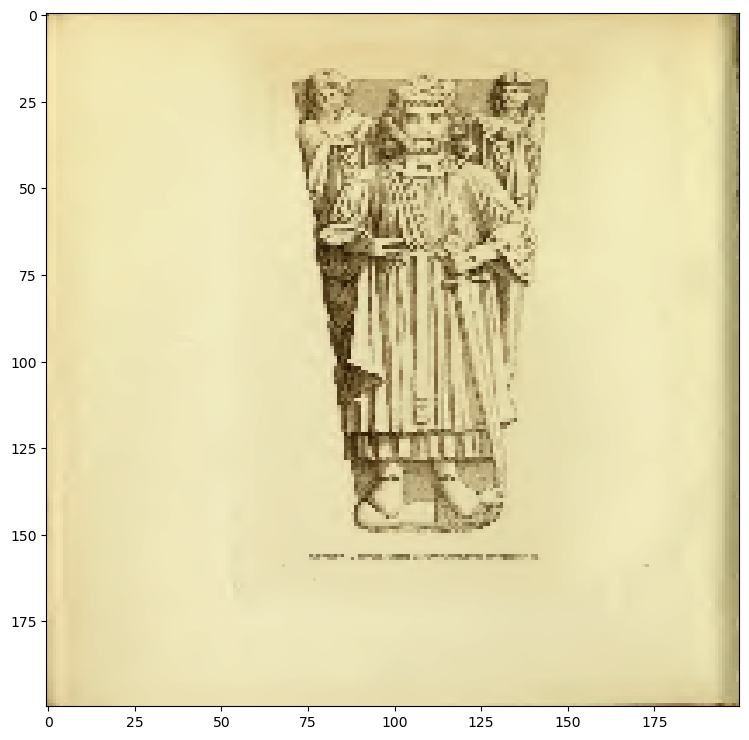

In [17]:
# set size of image
plt.figure(figsize=(9,9))
# display image inline
test_model = tf.keras.utils.array_to_img(images_all[8])
plt.imshow(test_model)

## Activity

### How can we make a dataframe with columns for predicted probability, best guess of label we should pick, true label, and whether the prediction was correct or not?

### Once we have that DataFrame, how can we use it to calculate per class precision and recall, make a confusion matrix, etc? 

| image | prob | predicted category | true category | correct (TF)|
|---|---|---|---|---|
| 0 | .99 | 1 | 1 | True |
| 8 | .91 | 0 | 0 | True |

In [27]:
df

,true_label,probability
83,1,3.356586e-18
370,1,8.570040e-17
12,1,2.576497e-14
170,1,2.600413e-13
55,1,4.214607e-12
...,...,...
15,1,9.989507e-01
243,1,9.991992e-01
205,1,9.994124e-01
21,0,9.994739e-01


In [35]:
import pandas as pd
df = pd.DataFrame()
df['true_label'] = labels_all
df['probability'] = preds
#df.head(40)
df = df.sort_values(by='probability')
inferred_labels = [0 for i in range(65)] + [1 for i in range(314)]
df['predicted_label'] = inferred_labels
df['compare'] = (df['true_label'] + df['predicted_label']) % 2
(1 - (sum(df['compare'])/len(df))) * 100


73.35092348284961

In [31]:
65/379

0.17150395778364116